# Linear Regression

In [1]:
# data
X, y = [1,2,3,4], [6,5,7,10]

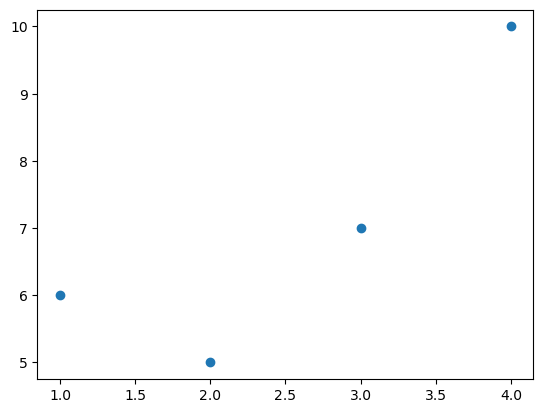

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,y);

In [12]:
# fit() from sklearn uses the analytical solution
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.asarray(X).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)
model = LinearRegression().fit(X, y)

In [13]:
model.intercept_, model.coef_

(array([3.5]), array([[1.4]]))

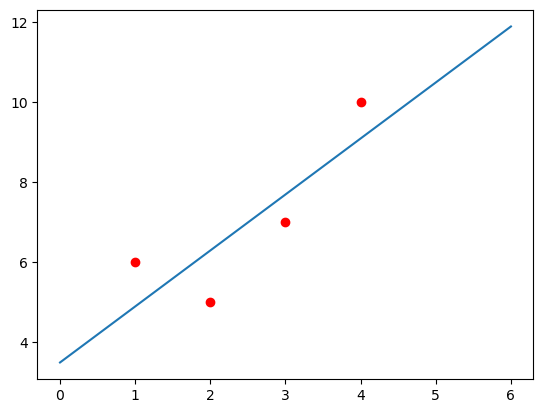

In [5]:
X_lin = np.linspace(0,6,100)
y_lin = 3.5 + X_lin*1.4
plt.scatter(X,y, color='red')
plt.plot(X_lin,y_lin);

In [14]:
# fit() by scanning through the parameter 
# to make it simple, we only vary the intercept parameter
def fit2(X,y):
    lbeta0 = []
    lloss = []
    for beta0 in np.linspace(-10,10,500):
        y_hat = beta0 + (1.4)*X
        loss = ((y - y_hat)**2).sum()
        lloss.append(loss)
        lbeta0.append(beta0)
    return lbeta0[np.argmin(lloss)]
fit2(X,y)

3.507014028056112

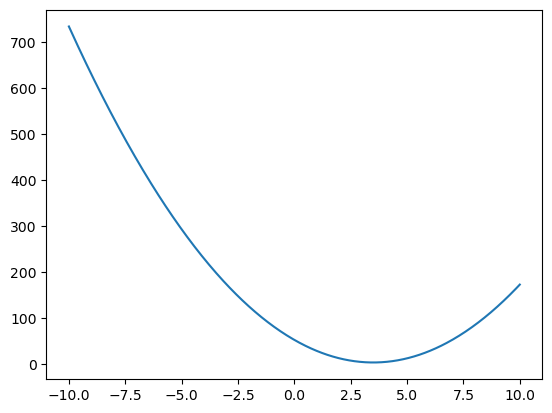

In [7]:
# plot the loss against beta0
lbeta0 = []
lloss = []
for beta0 in np.linspace(-10,10,500):
    y_hat = beta0 + (1.4)*X
    loss = ((y - y_hat)**2).sum()
    lloss.append(loss)
    lbeta0.append(beta0)
plt.plot(lbeta0,lloss);

In [15]:
# fit() using Gradient descent
n_epoch = 1000
learning_rate = 0.01
def fit3(X,y):
    beta0 = 0
    beta1 = 0
    for epoch in range(n_epoch):
        y_hat = beta0 + beta1*X
        dbeta0 = -(y - y_hat).sum()
        dbeta1 = -((y - y_hat)*X).sum()
        beta0 = beta0 - learning_rate * dbeta0    
        beta1 = beta1 - learning_rate * dbeta1  
    return beta0, beta1
fit3(X,y)

(3.493320731751479, 1.4022717657191226)

In [18]:
# --->>> Your turn <<<---
# fit() using random parameters
def fit4(X,y):
    lbetas = []
    lloss = []
    for _ in range(10000):
        beta0 = np.random.uniform(-10,10)
        beta1 = np.random.uniform(-10,10)
        y_hat = beta0 + beta1*X
        loss = ((y - y_hat)**2).sum()
        lloss.append(loss)
        lbetas.append((beta0,beta1))
    return lbetas[np.argmin(lloss)]
fit4(X,y)

(3.5202354963878024, 1.4013772945783187)